In [2]:
import pandas as pd
import numpy as np

file_path = '/content/bank-full.csv'
raw = pd.read_csv(file_path, delimiter=';')

raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# Step 3: Drop columns.
# For benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
columns_to_drop = ['duration', 'default']
data = raw.drop(columns=columns_to_drop)

In [4]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 16


In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()

In [ ]:
print(f"Shape of the dataset after removing duplicates: {data.shape}")

Shape of the dataset after removing duplicates: (45195, 15)


In [ ]:
print(f"\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   job        45195 non-null  object
 2   marital    45195 non-null  object
 3   education  45195 non-null  object
 4   default    45195 non-null  object
 5   balance    45195 non-null  int64 
 6   housing    45195 non-null  object
 7   loan       45195 non-null  object
 8   contact    45195 non-null  object
 9   day        45195 non-null  int64 
 10  month      45195 non-null  object
 11  campaign   45195 non-null  int64 
 12  pdays      45195 non-null  int64 
 13  previous   45195 non-null  int64 
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.9+ MB


In [ ]:
# Separate numerical and object columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

# Describe numerical data
numerical_description = numerical_data.describe()

# Describe categorical data
categorical_description = categorical_data.describe()

# Display the descriptions
print("Numerical Data Description:")
print(numerical_description)

print("\nCategorical Data Description:")
print(categorical_description)

Numerical Data Description:
                age        balance           day      campaign         pdays  \
count  45195.000000   45195.000000  45195.000000  45195.000000  45195.000000   
mean      40.937604    1362.754331     15.804824      2.763978     40.212413   
std       10.619108    3045.196838      8.322816      3.098304    100.143468   
min       18.000000   -8019.000000      1.000000      1.000000     -1.000000   
25%       33.000000      72.000000      8.000000      1.000000     -1.000000   
50%       39.000000     449.000000     16.000000      2.000000     -1.000000   
75%       48.000000    1428.000000     21.000000      3.000000     -1.000000   
max       95.000000  102127.000000     31.000000     63.000000    871.000000   

           previous  
count  45195.000000  
mean       0.580529  
std        2.303823  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  

Categorical Data Description:
                job  m

In [ ]:
# Bin 'age' into categories
bins_age = [0, 25, 50, 75, 100]
labels_age = ['youth', 'adult', 'senior', 'elderly']
data['age_group'] = pd.cut(data['age'], bins=bins_age, labels=labels_age, right=False)

# Bin 'balance' into categories
bins_balance = [-np.inf, 0, 1000, 5000, np.inf]
labels_balance = ['negative', 'low', 'medium', 'high']
data['balance_category'] = pd.cut(data['balance'], bins=bins_balance, labels=labels_balance, right=False)

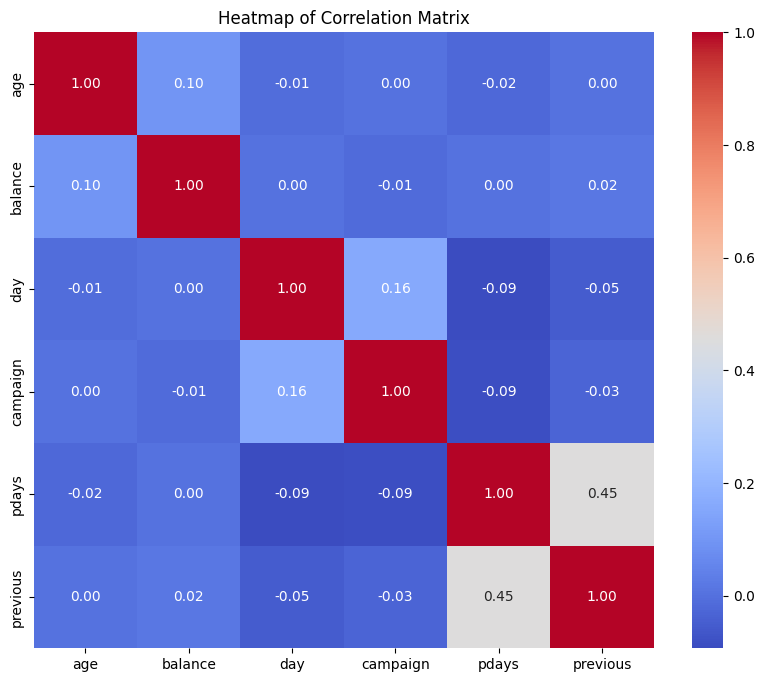

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [ ]:
# Select all columns with categorical data (dtype = object), excluding the target variable ('y').
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.drop('y')  # Exclude the target variable
print(f"\nCategorical Columns: {categorical_cols}")

for col in categorical_cols:
    print(f"\nUnique values in '{col}': {data[col].unique()}")


Categorical Columns: Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'age_group', 'balance_category'],
      dtype='object')

Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in 'marital': ['married' 'single' 'divorced']

Unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in 'housing': ['yes' 'no']

Unique values in 'loan': ['no' 'yes']

Unique values in 'contact': ['unknown' 'cellular' 'telephone']

Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']

Unique values in 'age_group': ['senior', 'adult', 'youth', 'elderly']
Categories (4, object): ['youth' < 'adult' < 'senior' < 'elderly']

Unique values in 'balance_category': ['medium', 'low', 'neg

In [ ]:
x = raw.drop(['y'], axis=1)
y = raw['y']
y.value_counts()

,count
y,
no,39922
yes,5289


<Axes: ylabel='count'>

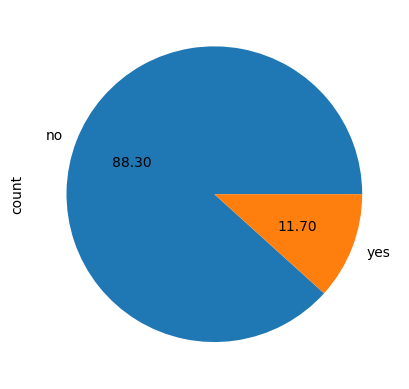

In [ ]:
import matplotlib.pyplot as plt

y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# Define a function to detect outliers using the IQR method for a given column
def detect_outliers_iqr_all(df):
    outliers = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers in the column
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers[column] = column_outliers
        print(f"Outliers in {column}:")
        print(column_outliers)
        print("\n")

    return outliers

# Apply the function to the dataset
outliers_dict = detect_outliers_iqr_all(data)


Outliers in age:
       age      job   marital  education  balance housing loan  day month  \
29158   83  retired   married    primary      425      no   no    2   feb   
29261   75  retired  divorced    primary       46      no   no    2   feb   
29263   75  retired   married    primary     3324      no   no    2   feb   
29322   83  retired   married   tertiary     6236      no   no    2   feb   
29865   75  retired  divorced    primary     3881     yes   no    4   feb   
...    ...      ...       ...        ...      ...     ...  ...  ...   ...   
45163   71  retired   married  secondary     2064      no   no    9   nov   
45191   75  retired  divorced   tertiary     3810     yes   no   16   nov   
45204   73  retired   married  secondary     2850      no   no   17   nov   
45207   71  retired  divorced    primary     1729      no   no   17   nov   
45208   72  retired   married  secondary     5715      no   no   17   nov   

       campaign  pdays  previous poutcome    y  
29158    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45195 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               45195 non-null  int64   
 1   job               45195 non-null  object  
 2   marital           45195 non-null  object  
 3   education         45195 non-null  object  
 4   default           45195 non-null  object  
 5   balance           45195 non-null  int64   
 6   housing           45195 non-null  object  
 7   loan              45195 non-null  object  
 8   contact           45195 non-null  object  
 9   day               45195 non-null  int64   
 10  month             45195 non-null  object  
 11  campaign          45195 non-null  int64   
 12  pdays             45195 non-null  int64   
 13  previous          45195 non-null  int64   
 14  poutcome          45195 non-null  object  
 15  y                 45195 non-null  object  
 16  age_group         45195 non

In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler

# Assume `data` and `categorical_cols` are defined

# Step 1: Label Encoding for Random Forest
label_encoded_data = data.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    label_encoded_data[col] = le.fit_transform(data[col])  # Transform to numeric labels
    label_encoders[col] = le

# Encode the target variable ('y') for Random Forest
label_encoder_y = LabelEncoder()
label_encoded_data['y'] = label_encoder_y.fit_transform(data['y'])

# Step 2: One-Hot Encoding for Neural Networks
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[('onehot', one_hot_encoder, categorical_cols)],
    remainder='passthrough'
)

# Apply the preprocessor to the dataset
one_hot_encoded_data = preprocessor.fit_transform(data)

# Retrieve the fitted OneHotEncoder and get feature names
fitted_one_hot_encoder = preprocessor.named_transformers_['onehot']
one_hot_encoded_feature_names = fitted_one_hot_encoder.get_feature_names_out(categorical_cols)

# Combine feature names and convert transformed data to DataFrame
all_feature_names = list(one_hot_encoded_feature_names) + list(data.drop(categorical_cols, axis=1).columns)
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data, columns=all_feature_names)

# Encode the target variable ('y') for Neural Networks
one_hot_encoded_data['y'] = label_encoder_y.transform(data['y'])

# Step 3: Feature Scaling for Neural Networks
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaled_data = one_hot_encoded_data.copy()
scaled_data[numerical_cols] = scaler.fit_transform(one_hot_encoded_data[numerical_cols])

# Step 4: Train-Test Split
X_rf = label_encoded_data.drop('y', axis=1)  # Features for Random Forest
y_rf = label_encoded_data['y']              # Target variable for Random Forest

X_nn = scaled_data.drop('y', axis=1)  # Features for Neural Networks
y_nn = scaled_data['y']              # Target variable for Neural Networks

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf)
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42, stratify=y_nn)

# Step 5: Address Class Imbalance with Undersampling Only
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Equalize classes

# Undersample Random Forest data
X_rf_train_balanced, y_rf_train_balanced = under_sampler.fit_resample(X_rf_train, y_rf_train)

# Undersample Neural Network data
X_nn_train_balanced, y_nn_train_balanced = under_sampler.fit_resample(X_nn_train, y_nn_train)

# Step 6: Display Results
print(f"\nRandom Forest Training Set Class Distribution After Undersampling:")
print(pd.Series(y_rf_train_balanced).value_counts(normalize=True))

print("\nNeural Network Training Set Class Distribution After Undersampling:")
print(pd.Series(y_nn_train_balanced).value_counts(normalize=True))

print("\nShapes After Undersampling:")
print("Random Forest Train Shape:", X_rf_train_balanced.shape)
print("Random Forest Test Shape:", X_rf_test.shape)
print("Neural Network Train Shape:", X_nn_train_balanced.shape)
print("Neural Network Test Shape:", X_nn_test.shape)



Random Forest Training Set Class Distribution After Undersampling:
y
0    0.5
1    0.5
Name: proportion, dtype: float64

Neural Network Training Set Class Distribution After Undersampling:
y
0    0.5
1    0.5
Name: proportion, dtype: float64

Shapes After Undersampling:
Random Forest Train Shape: (8462, 16)
Random Forest Test Shape: (9039, 16)
Neural Network Train Shape: (8462, 46)
Neural Network Test Shape: (9039, 46)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
# Combine features and target variable into a single DataFrame
rf_balanced_data = pd.concat([X_rf_train_balanced, y_rf_train_balanced], axis=1)
nn_balanced_data = pd.concat([X_nn_train_balanced, y_nn_train_balanced], axis=1)

# Check for duplicates in the Random Forest balanced dataset
rf_duplicates = rf_balanced_data.duplicated().sum()
print(f"Number of duplicate rows in Random Forest balanced dataset: {rf_duplicates}")

# Check for duplicates in the Neural Network balanced dataset
nn_duplicates = nn_balanced_data.duplicated().sum()
print(f"Number of duplicate rows in Neural Network balanced dataset: {nn_duplicates}")


Number of duplicate rows in Random Forest balanced dataset: 0
Number of duplicate rows in Neural Network balanced dataset: 0


In [ ]:
# Remove duplicates for Random Forest
rf_balanced_data = rf_balanced_data.drop_duplicates().reset_index(drop=True)
X_rf_train_balanced = rf_balanced_data.drop('y', axis=1)
y_rf_train_balanced = rf_balanced_data['y']

# Remove duplicates for Neural Networks
nn_balanced_data = nn_balanced_data.drop_duplicates().reset_index(drop=True)
X_nn_train_balanced = nn_balanced_data.drop('y', axis=1)
y_nn_train_balanced = nn_balanced_data['y']

# Display the results
print(f"Random Forest Training Set Shape After Cleaning: {rf_balanced_data.shape}")
print(f"Neural Network Training Set Shape After Cleaning: {nn_balanced_data.shape}")


Random Forest Training Set Shape After Cleaning: (8462, 17)
Neural Network Training Set Shape After Cleaning: (8462, 47)


In [ ]:
# Random Forest preprocessed datasets
rf_train_data = pd.concat([pd.DataFrame(X_rf_train_balanced), pd.Series(y_rf_train_balanced, name='y')], axis=1)
rf_test_data = pd.concat([pd.DataFrame(X_rf_test), pd.Series(y_rf_test, name='y')], axis=1)

# Save Random Forest datasets to CSV
rf_train_data.to_csv("/content/rf_train_data.csv", index=False)
rf_test_data.to_csv("/content/rf_test_data.csv", index=False)

# Neural Network preprocessed datasets
nn_train_data = pd.concat([pd.DataFrame(X_nn_train_balanced), pd.Series(y_nn_train_balanced, name='y')], axis=1)
nn_test_data = pd.concat([pd.DataFrame(X_nn_test), pd.Series(y_nn_test, name='y')], axis=1)

# Save Neural Network datasets to CSV
nn_train_data.to_csv("/content/nn_train_data.csv", index=False)
nn_test_data.to_csv("/content/nn_test_data.csv", index=False)

print("\nCSV files saved in the 'output' directory:")
print("- Random Forest Training Data: /content/rf_train_data.csv")
print("- Random Forest Testing Data: /content/rf_test_data.csv")
print("- Neural Network Training Data: /content/nn_train_data.csv")
print("- Neural Network Testing Data: /content/nn_test_data.csv")



CSV files saved in the 'output' directory:
- Random Forest Training Data: /content/rf_train_data.csv
- Random Forest Testing Data: /content/rf_test_data.csv
- Neural Network Training Data: /content/nn_train_data.csv
- Neural Network Testing Data: /content/nn_test_data.csv


In [ ]:
# rf_train_data = pd.read_csv("/content/rf_train_data.csv")

x = rf_train_data.drop(['y'], axis=1)
y = rf_train_data['y']
y.value_counts()

,count
y,
0,4231
1,4231


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Load Data from CSV Files
rf_train_data = pd.read_csv("/content/rf_train_data.csv")
rf_test_data = pd.read_csv("/content/rf_test_data.csv")
# Step 2: Separate Features and Target for Random Forest
X_rf_train_balanced = rf_train_data.drop('y', axis=1)
y_rf_train_balanced = rf_train_data['y']
X_rf_test = rf_test_data.drop('y', axis=1)
y_rf_test = rf_test_data['y']

# Step 3: Train Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42
)

rf_clf.fit(X_rf_train_balanced, y_rf_train_balanced)

# Predictions and Probabilities on Training Set
y_rf_train_pred = rf_clf.predict(X_rf_train_balanced)
y_rf_train_pred_prob = rf_clf.predict_proba(X_rf_train_balanced)[:, 1]

# Predictions and Probabilities on Test Set
y_rf_pred = rf_clf.predict(X_rf_test)
y_rf_pred_prob = rf_clf.predict_proba(X_rf_test)[:, 1]

# Step 4: Evaluate Model Performance

# Training Metrics
print("\nRandom Forest Training Metrics:")
print("Classification Report:")
print(classification_report(y_rf_train_balanced, y_rf_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf_train_balanced, y_rf_train_pred))
print("Accuracy:", accuracy_score(y_rf_train_balanced, y_rf_train_pred))
print("ROC AUC Score:", roc_auc_score(y_rf_train_balanced, y_rf_train_pred_prob))

# Test Metrics
print("\nRandom Forest Test Metrics:")
print("Classification Report:")
print(classification_report(y_rf_test, y_rf_pred))
print("Accuracy:", accuracy_score(y_rf_test, y_rf_pred))
print("ROC AUC Score:", roc_auc_score(y_rf_test, y_rf_pred_prob))



Random Forest Training Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      4231
           1       0.83      0.69      0.76      4231

    accuracy                           0.78      8462
   macro avg       0.78      0.78      0.77      8462
weighted avg       0.78      0.78      0.77      8462

Confusion Matrix:
[[3644  587]
 [1304 2927]]
Accuracy: 0.7765303710706689
ROC AUC Score: 0.8718231535579892

Random Forest Test Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7981
           1       0.31      0.65      0.42      1058

    accuracy                           0.79      9039
   macro avg       0.63      0.73      0.64      9039
weighted avg       0.87      0.79      0.82      9039

Confusion Matrix:
[[6426 1555]
 [ 368  690]]
Accuracy: 0.787255227348158
ROC AUC Score: 0.7912904679805464


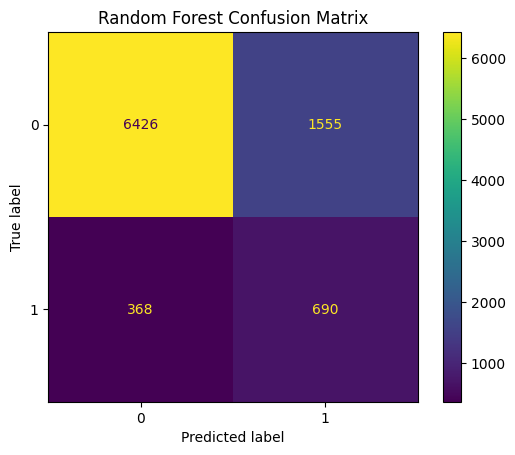

In [ ]:
# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, X_rf_test, y_rf_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import datetime

# Step 1: Load Data from CSV Files
nn_train_data = pd.read_csv("/content/nn_train_data.csv")
nn_test_data = pd.read_csv("/content/nn_test_data.csv")

# Step 2: Separate Features and Target
X_nn_train_balanced = nn_train_data.drop('y', axis=1)
y_nn_train_balanced = nn_train_data['y']
X_nn_test = nn_test_data.drop('y', axis=1)
y_nn_test = nn_test_data['y']
# Advanced Neural Network Model

nn_model = Sequential([
    Dense(256, input_shape=(X_nn_train_balanced.shape[1],)),  # First hidden layer
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# TensorBoard Logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = nn_model.fit(
    X_nn_train_balanced, y_nn_train_balanced,
    epochs=20,
    batch_size=32,
    validation_data=(X_nn_test, y_nn_test),
    verbose=1
)

# Predictions
y_nn_pred_prob = nn_model.predict(X_nn_test).flatten()
y_nn_pred = (y_nn_pred_prob > 0.5).astype(int)

# Predictions on Training Data
y_nn_train_pred_prob = nn_model.predict(X_nn_train_balanced).flatten()
y_nn_train_pred = (y_nn_train_pred_prob > 0.5).astype(int)

# Training Data Metrics
print("\nNeural Network Classification Report (Training Data):")
print(classification_report(y_nn_train_balanced, y_nn_train_pred))
print("Accuracy (Training Data):", accuracy_score(y_nn_train_balanced, y_nn_train_pred))
print("ROC AUC Score (Training Data):", roc_auc_score(y_nn_train_balanced, y_nn_train_pred_prob))

# Evaluation Metrics
print("\nNeural Network Classification Report:")
print(classification_report(y_nn_test, y_nn_pred))
print("Accuracy:", accuracy_score(y_nn_test, y_nn_pred))
print("ROC AUC Score:", roc_auc_score(y_nn_test, y_nn_pred_prob))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6088 - loss: 0.7070 - val_accuracy: 0.7896 - val_loss: 0.5457
Epoch 2/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6832 - loss: 0.6019 - val_accuracy: 0.7980 - val_loss: 0.5283
Epoch 3/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6808 - loss: 0.5930 - val_accuracy: 0.7891 - val_loss: 0.5397
Epoch 4/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6974 - loss: 0.5803 - val_accuracy: 0.8060 - val_loss: 0.5081
Epoch 5/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6998 - loss: 0.5689 - val_accuracy: 0.8036 - val_loss: 0.5176
Epoch 6/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7191 - loss: 0.5619 - val_accuracy: 0.8118 - val_loss: 0.5133
Epoch 7/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7155 - loss: 0.5599 - val_accuracy: 0.8081 - val_loss: 0.5138
Epoch 8/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7186 - loss: 0.5588 - val_accuracy: 0.

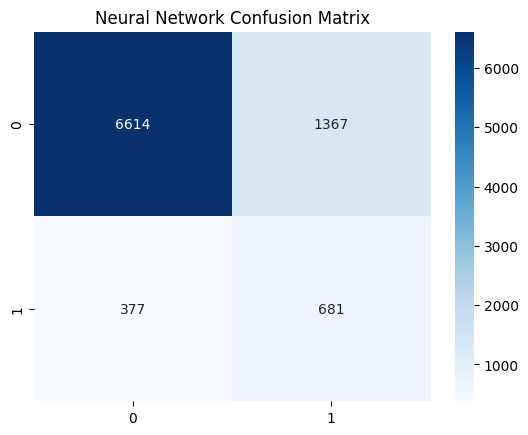

In [ ]:
# Neural Network
sns.heatmap(confusion_matrix(y_nn_test, y_nn_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.show()

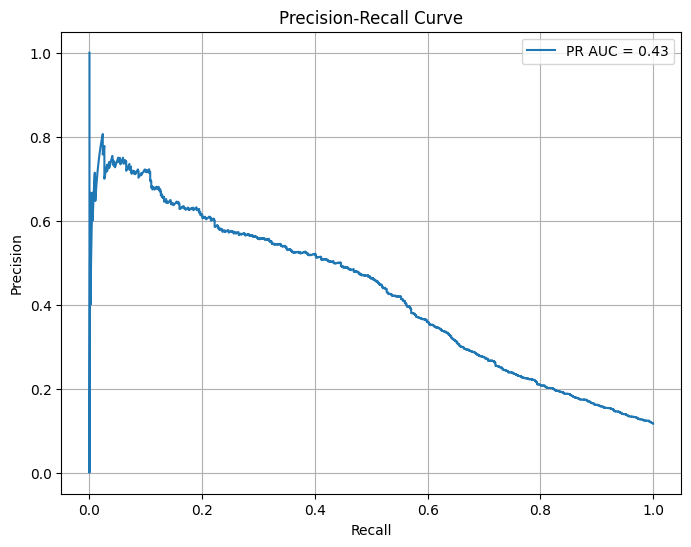

In [ ]:
# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_nn_test, y_nn_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

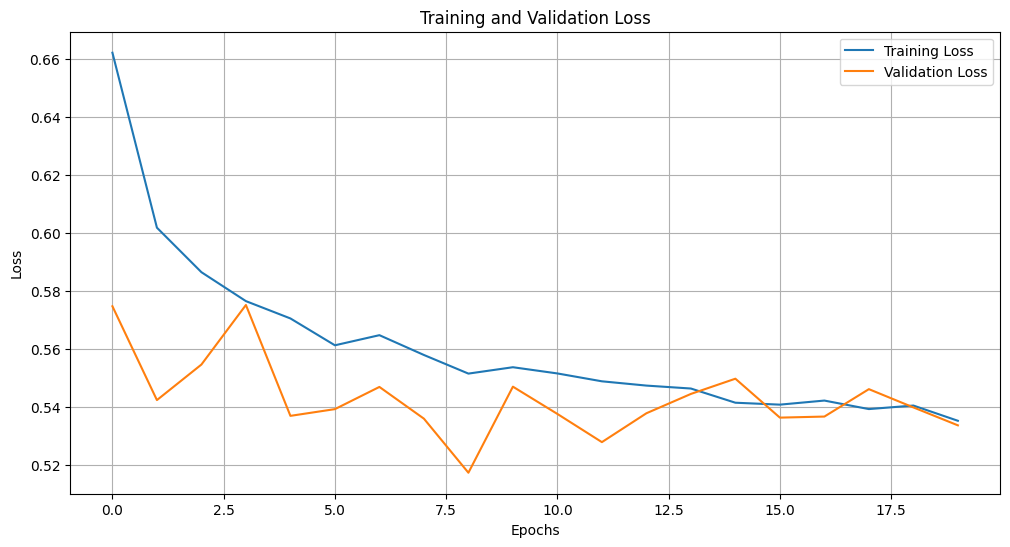

In [ ]:
# Plot Learning Curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

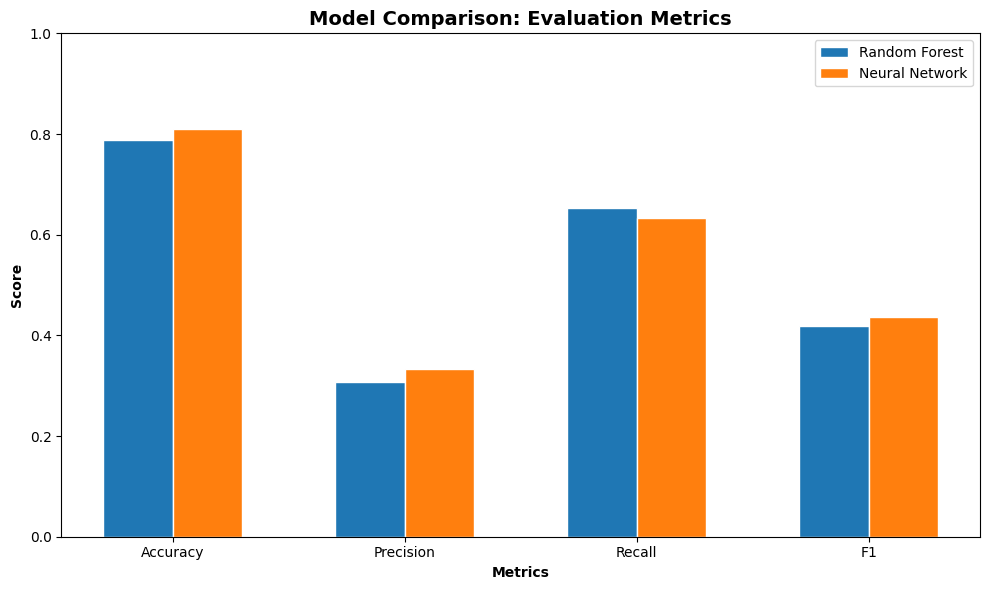

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluation metrics (replace with your actual data)
rf_eval = {
    'acc': accuracy_score(y_rf_test, y_rf_pred),
    'prec': classification_report(y_rf_test, y_rf_pred, output_dict=True)['1']['precision'],
    'rec': classification_report(y_rf_test, y_rf_pred, output_dict=True)['1']['recall'],
    'f1': classification_report(y_rf_test, y_rf_pred, output_dict=True)['1']['f1-score']
}

nn_eval = {
    'acc': accuracy_score(y_nn_test, y_nn_pred),
    'prec': classification_report(y_nn_test, y_nn_pred, output_dict=True)['1']['precision'],
    'rec': classification_report(y_nn_test, y_nn_pred, output_dict=True)['1']['recall'],
    'f1': classification_report(y_nn_test, y_nn_pred, output_dict=True)['1']['f1-score']
}

# Metrics and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
rf_scores = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nn_scores = [nn_eval['acc'], nn_eval['prec'], nn_eval['rec'], nn_eval['f1']]

# Bar chart for evaluation metrics
barWidth = 0.3
r1 = np.arange(len(metrics))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, rf_scores, width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r2, nn_scores, width=barWidth, edgecolor='white', label='Neural Network')

# Configure axes
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(len(metrics))], metrics)
plt.ylabel('Score', fontweight='bold')
plt.ylim(0, 1)
plt.title('Model Comparison: Evaluation Metrics', fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()
